In [0]:
from collections import Counter 
# Necessary libraries to import (for scratch)
import numpy as np
import pandas as pd

# Implementing the Predicitve Models using Sklearn
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier ## Decision Tree
from sklearn.linear_model import LogisticRegression ## for Logistic Regression
from sklearn.svm import SVC ## for SVM
from sklearn.neighbors import KNeighborsClassifier ## For KNN
from sklearn.ensemble import VotingClassifier

#for measuring the accuracy,precision,recall and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
#from sklearn.metrics import confusion_matrix

# for plotting the models 
import matplotlib.pyplot as plt

#for GridSearch Hyperparametes checking
from sklearn.model_selection import GridSearchCV
from copy import deepcopy
import random

In [0]:
#for google Colab
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
path="/content/gdrive/My Drive/Colab Notebooks/data.csv"

In [0]:
df=pd.read_csv(path)

In [0]:
Y_data=df["48"]
X_data=df.loc[:, df.columns != '48']

In [0]:
# create random train/test split only using np and pd
indices = list(range(X_data.shape[0]))
number_of_rows = int(0.8 * X_data.shape[0])
np.random.shuffle(indices)
train_indices = indices[:number_of_rows]
test_indices = indices[number_of_rows:]

# split the actual data
X_train, X_test = X_data.iloc[train_indices], X_data.iloc[test_indices]
Y_train, Y_test = Y_data.iloc[train_indices], Y_data.iloc[test_indices]

#converting dataframe type to array
X_train=X_train.values
y_train=Y_train.values
X_test=X_test.values
y_test=Y_test.values

In [0]:
# -*- coding: utf-8 -*-
"""
Predicitve_Analytics.py
"""
labels=[]
classifiers=[]
ensemble_predict=[]

#Utility Fucntions
def eucl_distance(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))
    

## Classifer Functions
def ConfusionMatrix(y_true,y_pred):
  
  row = len(np.unique(y_true)) # Number of classes 
  confusion_matrix = np.zeros((row+1, row+1))
  for i in range(len(y_true)):
    confusion_matrix[y_true[i]][y_pred[i]] += 1
  return np.vstack( confusion_matrix[1:row+1,1:row+1] ).astype(int)

def Accuracy(y_true,y_pred):
  return np.sum(y_true==y_pred)/len(y_true)

def Recall(y_true,y_pred):
  cm = ConfusionMatrix(y_true, y_pred)
  recall = np.diag(cm) / np.sum(cm, axis = 1)
  return np.mean(recall)

def Precision(y_true,y_pred):
  cm = ConfusionMatrix(y_true, y_pred)
  precision = np.diag(cm) / np.sum(cm, axis = 0)
  return np.mean(precision)

def WCSS(Clusters):
  #WCSS
  # Calculating mean of every clusters
  dist_sum = 0
  Cluster_mean = []
  Cluster_mean = np.mean(Kmean_centers, axis = 0)
  Cluster_mean
  # calculating distance from every centroid
  dist = np.zeros(len(Cluster_mean))
  for k in range(Kmean_centers.shape[0]):
    dist[k] = (((Cluster_mean[k] - Kmean_centers[k][np.newaxis,:]) ** 2).sum(axis=1)).sum(axis=0)
  dist_sum =(dist.sum(axis=-1))
  return (dist_sum)

def KNN(X_train,X_test,Y_train,k):
  X_train_new = (X_train- np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
  X_test_new = (X_test- np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
  def predict(X_test):
    predicted_labels=[_predict(x) for x in X_test_new]
    return np.array(predicted_labels)
    
  def _predict(x):
    dist=[eucl_distance(x,x_train) for x_train in X_train_new]
    top_k_nearest_indices=np.argsort(dist)[:k]
    k_nearest_labels=[Y_train[i] for i in top_k_nearest_indices]
    most_common=Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]
    
  predicted_y=predict(X_test)
    
  return predicted_y
    
    
        
        
def RandomForest(X_train,Y_train,X_test):
#https://machinelearningmastery.com/implement-random-forest-scratch-python/
#https://www.python-course.eu/Random_Forests.php

    def create_dataframe(x_train,y_train,x_test):
      df1=pd.DataFrame(x_train)
      df2=pd.DataFrame(y_train)
      test_df=pd.DataFrame(x_test)
      train_df=pd.concat((df1,df2),axis=1)
      return train_df,test_df


    x_train, x_test = create_dataframe(X_train, Y_train, X_test)

    train_df,test_df=create_dataframe(x_train,y_train,x_test)
    train_df["label"] = train_df.iloc[:,-1]
    train_df.drop(train_df.columns[48], inplace=True)
    column_names = []
    for column in train_df.columns:
        column=str(column)
        name = column.replace(" ", "_")
        column_names.append(name)
    train_df.columns = column_names


    test_column_names = []
    for column in test_df.columns:
        column=str(column)
        name = column.replace(" ", "_")
        test_column_names.append(name)
    test_df.columns = test_column_names

    def purity_check(data):

        col_label = data[:, -1]
        unique_class = np.unique(col_label)

        if len(unique_class) == 1:
            return True
        else:
            return False

    def data_classification(data):

        col_label = data[:, -1]
        unique_class, unique_count = np.unique(col_label, return_counts=True)

        idx = unique_count.argmax()
        classify_data = unique_class[idx]

        return classify_data

    def potential_decision_split(data, rand_sub):
        potential_split = {}
        col_idxs = list(range(data.shape[1] - 1))  # excluding the last column which is the label

        if rand_sub and rand_sub <= len(col_idxs):
            col_idxs = random.sample(population=col_idxs, k=rand_sub)

        for col_index in col_idxs:
            values = data[:, col_index]
            unique_values = np.unique(values)
            potential_split[col_index] = unique_values

        return potential_split

    def cal_entropy(data):

        col_label = data[:, -1]
        _, counts = np.unique(col_label, return_counts=True)

        probs = counts / counts.sum()
        entropy = sum(probs * -np.log2(probs))

        return entropy

    def cal_total_entropy(data_b, data_a):

        n = len(data_b) + len(data_a)
        p_data_b = len(data_b) / n
        p_data_a = len(data_a) / n

        total_entropy = (p_data_b * cal_entropy(data_b)
                         + p_data_a * cal_entropy(data_a))

        return total_entropy

    def best_decision_split(data, potential_split):

        overall_entropy = 3456
        for col_idx in potential_split:
            for val in potential_split[col_idx]:
                data_b, data_a = split_data(data, split_col=col_idx, split_val=val)
                current_total_entropy = cal_total_entropy(data_b, data_a)

                if current_total_entropy <= overall_entropy:
                    overall_entropy = current_total_entropy
                    best_col_split = col_idx
                    best_split_val = val

        return best_col_split, best_split_val

    def split_data(data, split_col, split_val):

        split_column_val = data[:, split_col]
        data_b = data[split_column_val <= split_val]
        data_a = data[split_column_val > split_val]

        return data_b, data_a

    def decision_tree_algo(stats, counter=0, sampe_min=2, max_dep=5, rand_sub=None):

        # data preparations
        if counter == 0:
            global COLUMN_HEADERS
            COLUMN_HEADERS = stats.columns
            data = stats.values
        else:
            data = stats

            # base cases
        if (purity_check(data)) or (len(data) < sampe_min) or (counter == max_dep):
            classification = data_classification(data)

            return classification


        # recursive part
        else:
            counter += 1

            potential_split = potential_decision_split(data, rand_sub)
            split_col, split_val = best_decision_split(data, potential_split)
            data_b, data_a = split_data(data, split_col, split_val)

            if len(data_b) == 0 or len(data_a) == 0:
                classification = data_classification(data)
                return classification

            feature_name = COLUMN_HEADERS[split_col]
            question = "{} <= {}".format(feature_name, split_val)

            sub_tree = {question: []}

            y_ans = decision_tree_algo(data_b, counter, sampe_min, max_dep, rand_sub)
            n_ans = decision_tree_algo(data_a, counter, sampe_min, max_dep, rand_sub)

            if y_ans == n_ans:
                sub_tree = y_ans
            else:
                sub_tree[question].append(y_ans)
                sub_tree[question].append(n_ans)

            return sub_tree

    def example_predict(exp, t):
        ques = list(t.keys())[0]
        feature_name, comparison_op, val = ques.split(" ")

        if int(exp[feature_name]) <= float(val):
            ans = t[ques][0]
        else:
            ans = t[ques][1]
        if not isinstance(ans, dict):
            return ans
        else:
            tree = ans
        return example_predict(exp, tree)

    def decision_tree_predict(test, t):
        predict = test.apply(example_predict, args=(t,), axis=1)
        return predict

    def random_forest_algo(train, num_tree, n_btstrp, num_features, dt_max_dep):
        forest = []
        for i in range(num_tree):
            btstrp_idx = np.random.randint(low=0, high=len(train), size=n_btstrp)
            stats_btstrp = train.iloc[btstrp_idx]
            tree = decision_tree_algo(stats_btstrp, max_dep=dt_max_dep, rand_sub=num_features)
            forest.append(tree)

        return forest

    def random_forest_predict(test, forest):
        stats_prediction = {}
        for i in range(len(forest)):
            col_name = "tree_{}".format(i)
            predictions = decision_tree_predict(test, t=forest[i])
            stats_prediction[col_name] = predictions

        stats_prediction = pd.DataFrame(stats_prediction)
        random_forest_predict = stats_prediction.mode(axis=1)[0]

        return random_forest_predict


    forest = random_forest_algo(train_df, num_tree=60, n_btstrp=600, num_features=2, dt_max_dep=10)
    predictions = random_forest_predict(test_df, forest)
    y_pred = predictions.to_numpy()
    return y_pred
    
def PCA(X_train,N):

    
    X_new = (X_train- np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    X_cov=np.cov(X_new.T)

    eigen_values,eigen_vectors=np.linalg.eig(X_cov)
    #print(eigen_vectors)

    #making a list of  eigenvalue,eigenvector
    eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

    #Sort from high to low
    eig_pairs.sort(key=lambda x: x[0],reverse=True)

    tot=sum(eigen_values)
    #To check which feature has maximum variance
    variance_=[(i/tot)*100 for i in sorted(eigen_values,reverse=True)]
    #to check till what feature we have maximum covariance
    cumulative_variance_=np.cumsum(variance_)

    matrix_new=np.hstack(eig_pairs[i][1].reshape(X_train.shape[1],1) for i in range(N))
    new_dataset=X_train.dot(matrix_new)
    return new_dataset
    
def Kmeans(X_train,N):
    #https: // mubaris.com / posts / kmeans - clustering /
    #http: // madhugnadig.com / articles / machine - learning / 2017 / 03 / 04 / implementing - k - means - clustering -from-scratch - in -python.html
    #https: // www.kaggle.com / andyxie / k - means - clustering - implementation - in -python
    # Number of clusters
    K = N
    # Number of training data
    n = X_train.shape[0]
    # Number of features in the data
    c = X_train.shape[1]

    # Generating random centers
    mean = np.mean(X_train, axis = 0)
    std = np.std(X_train, axis = 0)
    Kmean_centers = np.random.randn(K,c)*std + mean

    Kmean_centers_old = np.zeros(Kmean_centers.shape) # to store old centers
    Kmean_centers_new = deepcopy(Kmean_centers) # Store new centers

    kmean_clusters = np.zeros(n)
    dist = np.zeros((n,K))

    error = np.linalg.norm(Kmean_centers_new - Kmean_centers_old)

    # Converging the loop
    while error != 0:
      # Calculate the distance from every center
      for i in range(K):
        dist[:,i] = np.linalg.norm(X_train - Kmean_centers[i], axis=1)
      # G all training data to closest center
        kmean_clusters = np.argmin(dist, axis = 1)

        Kmean_centers_old = deepcopy(Kmean_centers_new)
      # Calculate mean for every cluster and update the center
      for i in range(K):
        Kmean_centers_new[i] = np.mean(X_train[kmean_clusters == i], axis=0)
        error = np.linalg.norm(Kmean_centers_new - Kmean_centers_old)
    return Kmean_centers_new

def SklearnSupervisedLearning(X_train,Y_train,X_test):
    
    ##--------Support Vector Machines ------- ##
    print("--------- Performing SVM Classification ---------")  
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, Y_train)
    y_pred = svclassifier.predict(X_test)
    print("Accuracy of SVM model: "+str(Accuracy(y_test,y_pred)))
    labels.append("SVM")
    ensemble_predict.append(y_pred)

    ## --------Logistic Regression ---------- ##
    print("--------- Performing Logistic Regression ----------")
    lg_classifier = LogisticRegression(dual=False,solver='newton-cg',multi_class='multinomial',max_iter=400).fit(X_train, y_train)
    #lg_classifier = LogisticRegression().fit(X_train, y_train)
    y_pred=lg_classifier.predict(X_test)
    print("Accuracy of Logistic Regression model: "+str(Accuracy(y_test,y_pred)))
    labels.append("Logistic Regression")
    ensemble_predict.append(y_pred)    
    
    # ## --------- Decision Tree ------------ ##
    print("--------- Performing Decision Tree Classification ---------")
    dt_classifer = DecisionTreeClassifier().fit(X_train, Y_train)
    y_pred=dt_classifer.predict(X_test)
    print("Accuracy of Decision Tree model: "+str(Accuracy(y_test,y_pred)))
    labels.append("Decision Tree")
    ensemble_predict.append(y_pred)

    ## ------------- KNN ----------------- ##
    print("--------- Performing KNN Classification ---------")
    ## Normalizing the data
    X_train_new = (X_train- np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
    X_test_new = (X_test- np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
    ## Implementing the sklearn model of KNN
    k=5
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_new,Y_train)
    y_pred=knn_classifier.predict(X_test_new)
    print("Accuracy of KNN model: "+str(Accuracy(y_test,y_pred)))
    labels.append("KNN")
    ensemble_predict.append(y_pred)

    return ensemble_predict


def SklearnVotingClassifier(X_train,Y_train,X_test):
  # Declaring the classifiers which is to be used for VotingClassifier for prediction
  print("----------- Preforming VotingClassifier ----------")
  clf1=SVC(kernel='linear')
  clf2=LogisticRegression(dual=False,solver='newton-cg',multi_class='multinomial',max_iter=500)
  clf3=DecisionTreeClassifier()
  clf4=KNeighborsClassifier(n_neighbors=10)

  # Using the models for voting based classification (used hard voting classifier to get the most frequent predictions from other classifers)
  voting_clf_hard=VotingClassifier(estimators=[(labels[0],clf1),(labels[1],clf2),(labels[2],clf3),(labels[3],clf4)],voting='hard')
  voting_clf_hard.fit(X_train,Y_train)
  y_pred=voting_clf_hard.predict(X_test)
  print("Accuracy of Voting Classifier : "+str(Accuracy(y_test,y_pred)))
  labels.append("Voting Classifier")
  ensemble_predict.append(y_pred)
  return y_pred

def plot_my_graph(y_test):
  i=0
  for i in range(len(ensemble_predict)):
    rangeforticks=np.max(np.unique(y_test))
    cm=ConfusionMatrix(y_test,ensemble_predict[i])
    fig = plt.figure(figsize=(10,7)) 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(cm) 
    plt.title(labels[i]) 
    plt.xticks(np.arange(len(np.unique(y_test))), (np.unique(y_test)))
    plt.yticks(np.arange(len(np.unique(y_test))), (np.unique(y_test)))
    fig.colorbar(cax)
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()
  


In [0]:
#Evaluating Models
all_classifiers=SklearnSupervisedLearning(X_train,y_train,X_test)


--------- Performing SVM Classification ---------
Accuracy of SVM model: 0.8585205078125
--------- Performing Logistic Regression ----------
Accuracy of Logistic Regression model: 0.7962646484375
--------- Performing Decision Tree Classification ---------
Accuracy of Decision Tree model: 0.982421875
--------- Performing KNN Classification ---------
Accuracy of KNN model: 0.8040771484375


In [0]:
only_voting=SklearnVotingClassifier(X_train,y_train,X_test)

----------- Preforming VotingClassifier ----------
Accuracy of Voting Classifier : 0.8768310546875


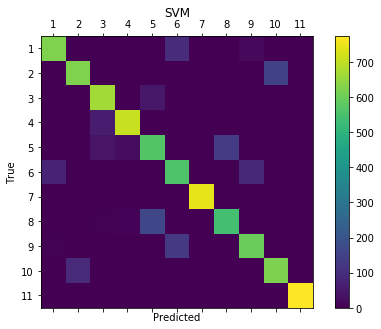

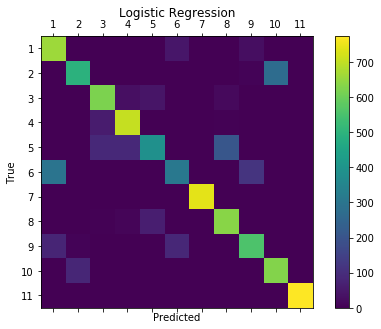

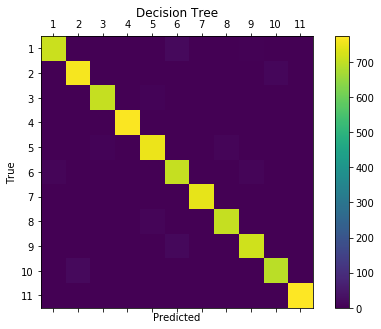

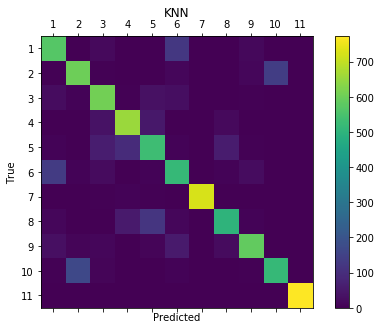

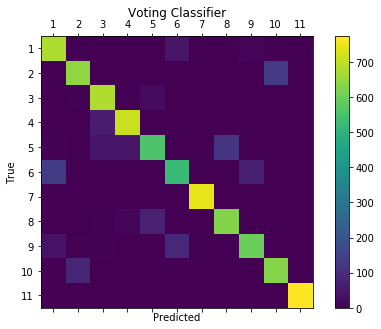

In [0]:
#Plot Confusion Matrix for all 5 models
plot_my_graph(y_test)

In [0]:
def GridSearch_decisionTree(X_train,y_train,X_test,y_test,gridsearchon):
  accuracy1=[]
  if gridsearchon=="max_depth":
    search=[4,6,8,12,15,20]
    for x in search:
      clf1=DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=x).fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      accuracy1.append(Accuracy(y_test,y_pred))
  elif gridsearchon=="splitter":
    search=['random','best']
    for x in search:
      clf1=DecisionTreeClassifier(criterion='entropy', splitter=x, max_depth=None).fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      accuracy1.append(Accuracy(y_test,y_pred))
  else:
    search=['entropy','gini']
    for x in search:
      clf1=DecisionTreeClassifier(criterion=x, splitter='random', max_depth=None).fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      accuracy1.append(Accuracy(y_test,y_pred))

  plt.title('Decision Tree HyperParameter Search')
  plt.plot(search,accuracy1)
  plt.xlabel(gridsearchon)
  plt.ylabel('Accuracy')

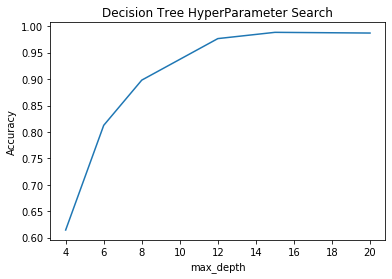

In [0]:
GridSearch_decisionTree(X_train,y_train,X_test,y_test,"max_depth")

In [0]:
#Grid Search for KNN
def GridSearch_KNN(X_train,y_train,X_test,y_test,k_range):
  accuracy1=[]
  X_train_new = (X_train- np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
  X_test_new = (X_test- np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

    
  for k in range(1,k_range):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_new,y_train)
    y_pred=knn_classifier.predict(X_test_new)
    accuracy1.append(Accuracy(y_test,y_pred))

  plt.title('KNN HyperParameter Search')
  plt.plot(range(1,k_range),accuracy1)
  plt.xlabel('Number of k')
  plt.ylabel('Accuracy')


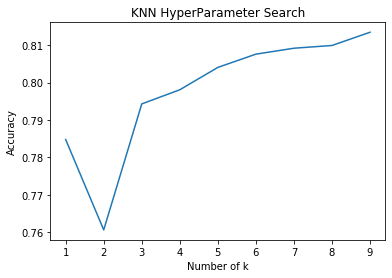

In [0]:
GridSearch_KNN(X_train,y_train,X_test,y_test,10)

In [0]:
#Grid Search for SVM
def GridSearch_SVM(X_train,y_train,X_test,y_test,gridsearchon):
  accuracy1=[]
  if gridsearchon=="kernel_type":
    search=['linear', 'poly', 'rbf', 'sigmoid']
    for x in search:
      clf1 = SVC(kernel=x,gamma='scale',C=1.0,degree=3).fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      accuracy1.append(Accuracy(y_test,y_pred))
  elif gridsearchon=="gamma":
    search=['scale','auto']
    for x in search:
      clf1 = SVC(kernel='linear',gamma=x,C=1.0,degree=3).fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      accuracy1.append(Accuracy(y_test,y_pred))
  elif gridsearchon=="C":
    search=[0.01,0.1,1.0,10.0,100.0]
    for x in search:
      clf1 = SVC(kernel='linear',gamma='scale',C=x,degree=3).fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      accuracy1.append(Accuracy(y_test,y_pred))
  else:
    search = [0, 1, 2, 3, 4, 5, 6]
    for x in search:
      clf1 = SVC(kernel='linear',gamma='scale',C=1.0,degree=x).fit(X_train,y_train)
      y_pred=clf1.predict(X_test)
      accuracy1.append(Accuracy(y_test,y_pred))

  plt.title('SVM HyperParameter Search')
  plt.plot(search,accuracy1)
  plt.xlabel(gridsearchon)
  plt.ylabel('Accuracy')


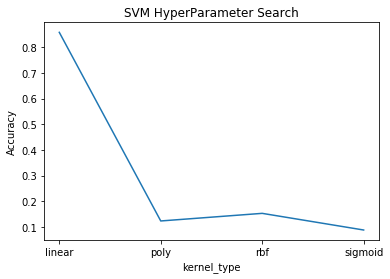

In [0]:
GridSearch_SVM(X_train,y_train,X_test,y_test,"kernel_type")

In [0]:
####----- PCA from Scratch ------####
y_pred_PCA=PCA(X_train,5)
print(y_pred_PCA.shape)

(32764, 5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [0]:
##------K means from Scratch -----###
Kmean_centers=Kmeans(X_train,6)
Kmean_centers

array([[-2.51512000e-06, -2.22977600e-06,  3.22856000e-06,
         3.44246000e-06, -1.03439620e-04,  5.28140000e-04,
        -1.78156000e-02, -1.78136000e-02, -1.78168000e-02,
         1.46340000e-03,  1.56660000e-03,  1.03840000e-03,
         9.43130000e-04,  3.74664000e-04,  1.12959200e-03,
         2.01448600e-03,  3.51163400e-03,  8.39054600e-03,
         1.73468000e+00,  1.73468000e+00,  1.73462000e+00,
         1.74032000e+00,  1.74046000e+00,  1.74036000e+00,
        -2.37581720e-01,  1.95000000e-04,  6.51026000e-01,
         1.99939844e+00, -4.52084000e-01,  1.16080800e+00,
         7.16708000e-03,  7.16808000e-03,  7.18192000e-03,
        -7.56993280e-03, -7.90862240e-03, -7.15492600e-03,
         1.90451040e+01,  1.42106400e+01,  7.81476000e+01,
         2.31970454e+02,  2.05133000e+01,  3.25751400e+01,
        -1.49482000e+00, -1.49482000e+00, -1.49480000e+00,
        -1.50386000e+00, -1.50422000e+00, -1.50386000e+00],
       [-3.08169602e-06,  2.35561806e-06,  1.90096078e-

In [0]:
####----- KNN from Scratch ------####
y_pred_KNN=KNN(X_train,X_test,y_train,10)
print(Accuracy(y_test,y_pred))

In [0]:
### --- Random Forest from scratch ----- ###
y_pred_random=RandomForest(X_train,y_train,X_test)
print(Accuracy(y_test,y_pred_random))